In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from dice_rl_TU_Vienna.latex import latex_labels
from dice_rl_TU_Vienna.value import get_get_policy_value_dataset
from dice_rl_TU_Vienna.plot.continuous import get_log

from plugins.medical_rl.sepsis_amsterdam.continuous.load import *
from plugins.medical_rl.sepsis_amsterdam.continuous.plot import get_plot_logs

/Users/richardweiss/Documents/.venvs/dice_rl_TU_Vienna/lib/python3.11/site-packages/tf_agents/__init__.py:58: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if distutils.version.LooseVersion(
/Users/richardweiss/Documents/.venvs/dice_rl_TU_Vienna/lib/python3.11/site-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <
/Users/richardweiss/Documents/.venvs/dice_rl_TU_Vienna/lib/python3.11/site-packages/tf_agents/utils/common.py:91: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  distutils.version.LooseVersion(tf.__version__)


In [3]:
get_behavior_policy_value, _ = get_get_policy_value_dataset(dataset)

# Selected Plots

In [4]:
def plot_single(algorithm, gamma, batchs, hd, lr, xlim=None, ylim1=None, ylim2=None, yscale=False, axvspan=None):
    if algorithm == "NeuralDualDice":
        x = f"gam{gamma}_batchs{batchs}_seed42_hdp{hd}_hdd{hd}_lrp{lr}_lrd{lr}_regp0.0_regd0.0_fexp1.5"
    else:
        x = f"gam{gamma}_batchs{batchs}_seed42_hdp{hd}_hdd{hd}_lrp{lr}_lrd{lr}_regp0.0_regd0.0_nlr{lr}_nreg1.0"
    hparam_str_evaluation = x

    log = get_logs(
        log_dir=os.path.join(
            outputs_dir, hparam_str_dataframe, hparam_str_policy, hparam_str_dataset,
            algorithm,
            hparam_str_evaluation,
        ),
    )

    _, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 5), tight_layout=True)

    y = get_behavior_policy_value(gamma) / (1 - gamma)
    ax1.axhline(y=y, label="OnPE behavior", color="black", linestyle=":")

    x = np.array(log["data"]["pv_s"]["steps"])
    y = np.array(log["data"]["pv_s"]["values"]) / (1 - gamma)
    if yscale: ax1.semilogy(x, y, label="simple")
    else:      ax1.plot    (x, y, label="simple")

    x = np.array(log["data"]["pv_w"]["steps"])
    y = np.array(log["data"]["pv_w"]["values"]) / (1 - gamma)
    if yscale: ax1.semilogy(x, y, label="weighted")
    else:      ax1.plot    (x, y, label="weighted")

    x = np.array(log["data"]["loss"]["steps"])
    y = np.array(log["data"]["loss"]["values"])
    ax2.plot(x, y, color="black")

    x = np.array(log["data"]["cos_angle"]["steps"])
    y = np.array(log["data"]["cos_angle"]["values"])
    y = np.arccos(y)
    ax3.plot(x, y, color="black")

    ax1.set_ylabel( latex_labels["pv_scaled"]() )
    ax2.set_ylabel( latex_labels["loss"]("") )
    ax3.set_ylabel( r"$\measuredangle ( \nabla P^\pi v, \nabla v )$" )

    ax3.set_yticks(      [ 0,      1/16 * np.pi,        1/8 * np.pi,        3/16 * np.pi,           ] )
    ax3.set_yticklabels( [ r"$0$", r"$\frac{\pi}{16}$", r"$\frac{\pi}{8}$", r"$\frac{ 3 \pi}{16}$", ] )


    if xlim is not None:
        ax1.set_xlim(xlim)
        ax2.set_xlim(xlim)
    if ylim1 is not None: ax1.set_ylim(ylim1)
    if ylim2 is not None: ax2.set_ylim(ylim2)

    if axvspan is not None:
        ax1.axvspan(*axvspan, color="black", alpha=0.1)
        ax2.axvspan(*axvspan, color="black", alpha=0.1)
        ax3.axvspan(*axvspan, color="black", alpha=0.1)

    title_hparams = [ f"gamma={gamma}", f"batch size={batchs}", f"hidden dimensions={hd}", f"learning rate={lr}", ]

    suptitle = algorithm + "\n" + ", ".join(title_hparams)
    plt.suptitle(suptitle)

    plt.xlabel("step")

    ax1.legend()

    ax1.grid(linestyle=":")
    ax2.grid(linestyle=":")
    ax3.grid(linestyle=":")

    file_name = algorithm + "; " + ", ".join(title_hparams)
    path = os.path.join(save_dir_images, f"{file_name}.png")
    plt.savefig(path)

    plt.show()

Getting log: data/medical_rl/sepsis_amsterdam/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralDualDice/gam0.9_batchs1024_seed42_hdp(32,)_hdd(32,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1733620284.MacBook-Pro-von-Richard.local.62831.0.v2


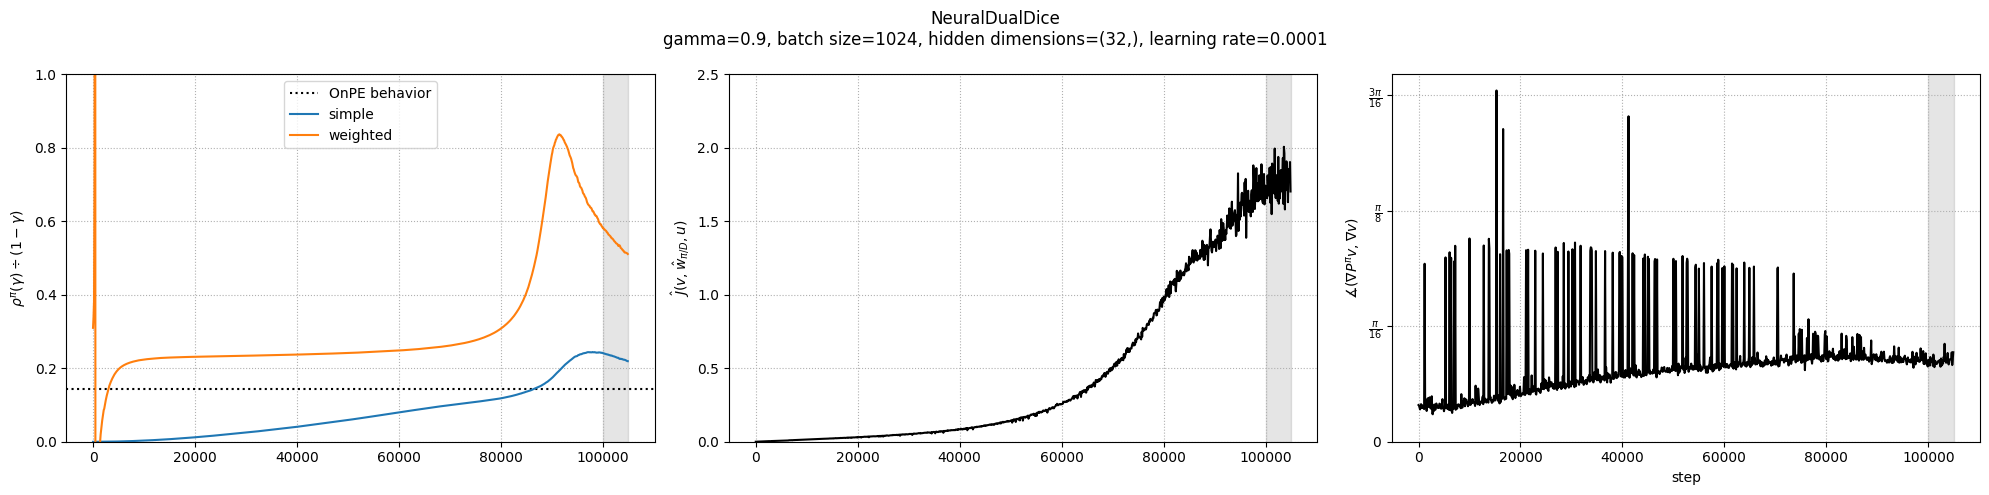

Getting log: data/medical_rl/sepsis_amsterdam/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGradientDice/gam0.9_batchs1024_seed42_hdp(32,)_hdd(32,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg1.0/events.out.tfevents.1733755019.MacBook-Pro-von-Richard.local.90710.0.v2


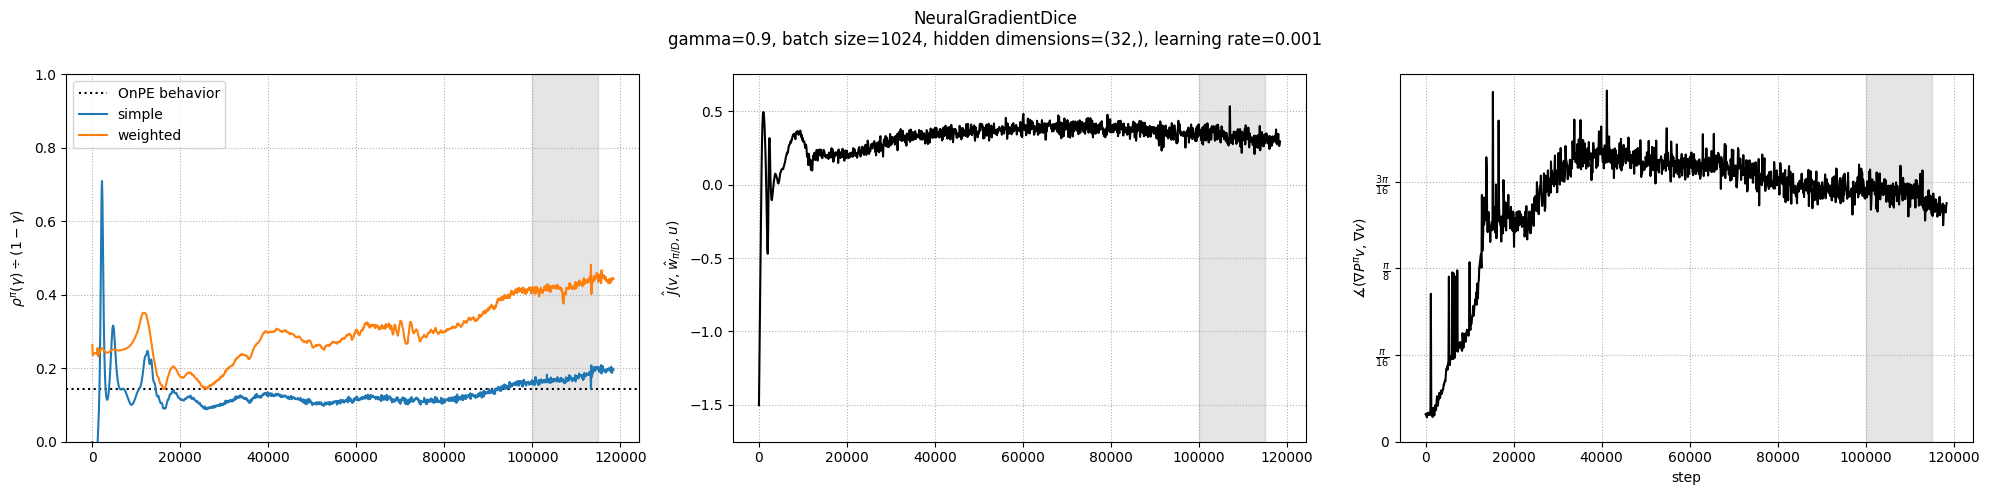

Getting log: data/medical_rl/sepsis_amsterdam/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGenDice/gam0.9_batchs1024_seed42_hdp(32,)_hdd(32,)_lrp1e-05_lrd1e-05_regp0.0_regd0.0_nlr1e-05_nreg1.0/events.out.tfevents.1733639468.MacBook-Pro-von-Richard.local.62831.3.v2


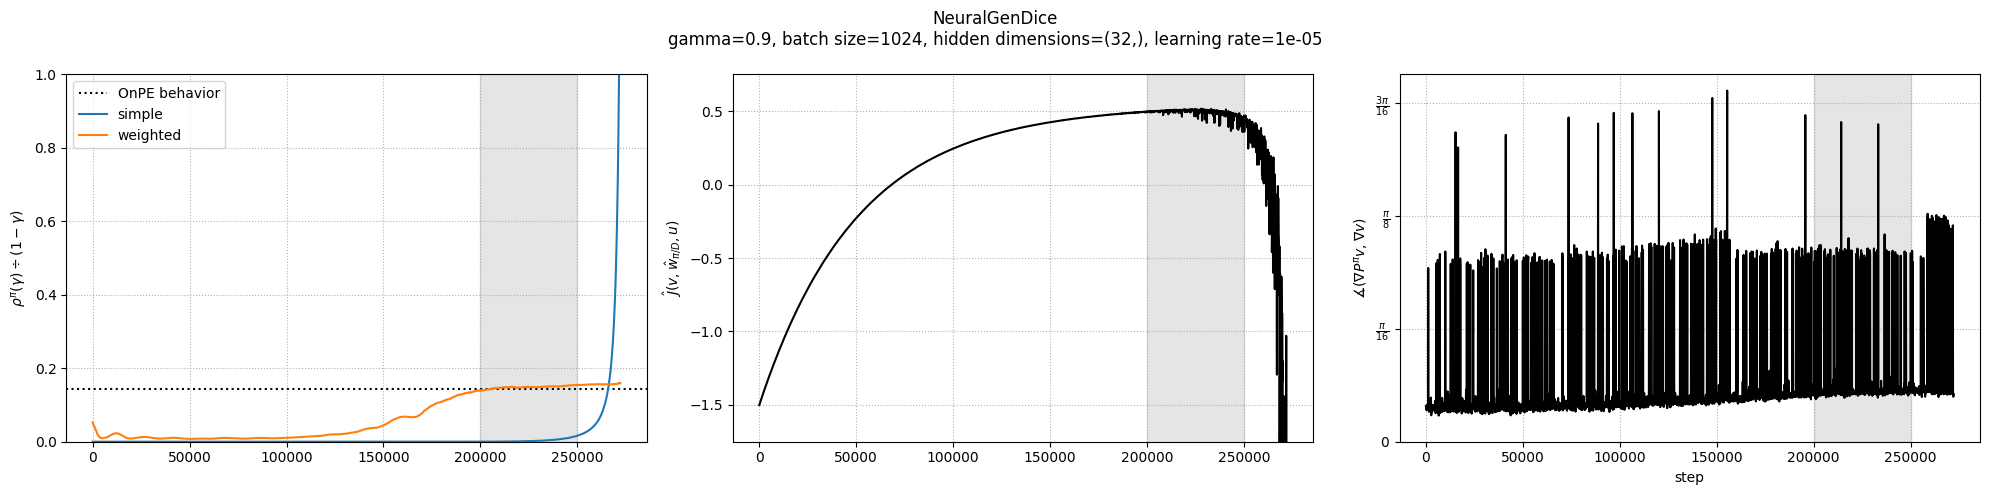

In [82]:
plot_single("NeuralDualDice",     0.9, 1024, (32,), 1e-4, ylim1=(0, 1), ylim2=(0, 2.5),      axvspan=(100_000, 105_000))
plot_single("NeuralGradientDice", 0.9, 1024, (32,), 1e-3, ylim1=(0, 1), ylim2=(-1.75, 0.75), axvspan=(100_000, 115_000))
plot_single("NeuralGenDice",      0.9, 1024, (32,), 1e-5, ylim1=(0, 1), ylim2=(-1.75, 0.75), axvspan=(200_000, 250_000))

Getting log: data/medical_rl/sepsis_amsterdam/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralDualDice/gam0.9_batchs1024_seed42_hdp(64,)_hdd(64,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1733626083.MacBook-Pro-von-Richard.local.62831.1.v2


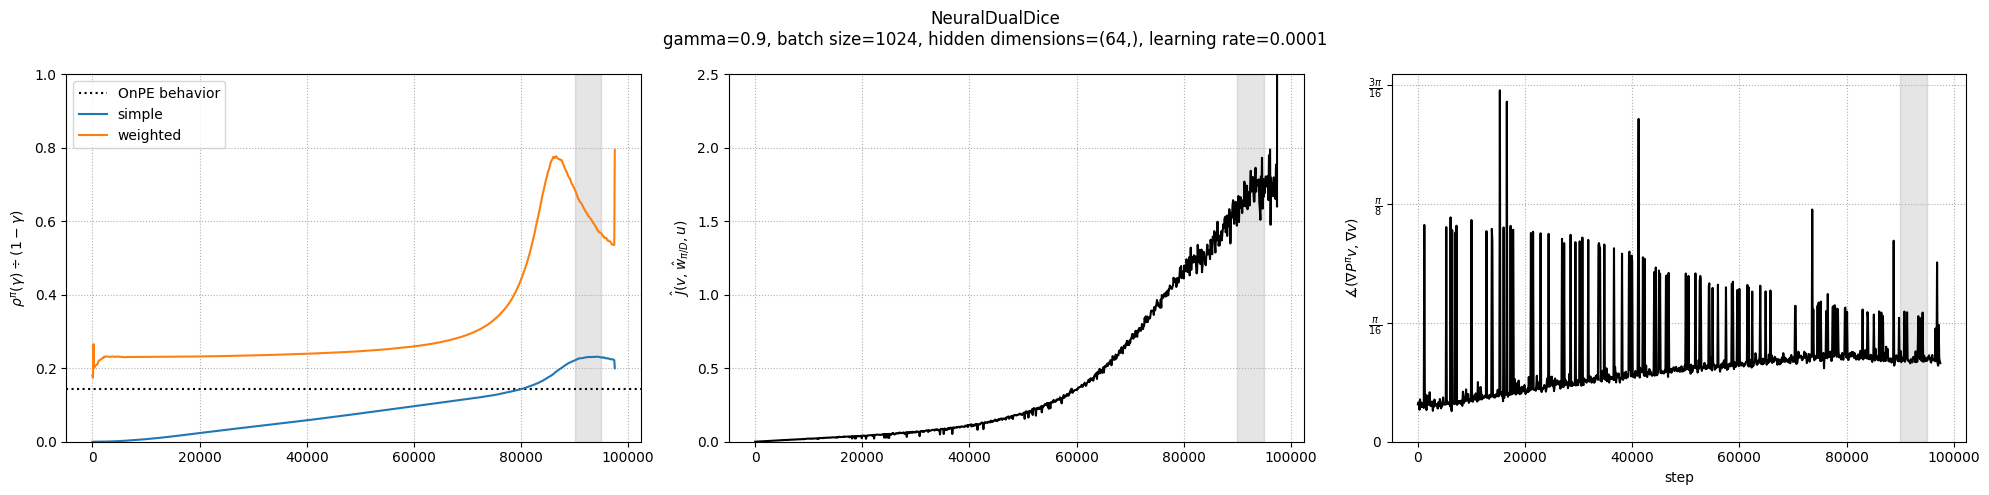

Getting log: data/medical_rl/sepsis_amsterdam/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGradientDice/gam0.9_batchs1024_seed42_hdp(64,)_hdd(64,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg1.0/events.out.tfevents.1733762128.MacBook-Pro-von-Richard.local.90710.1.v2


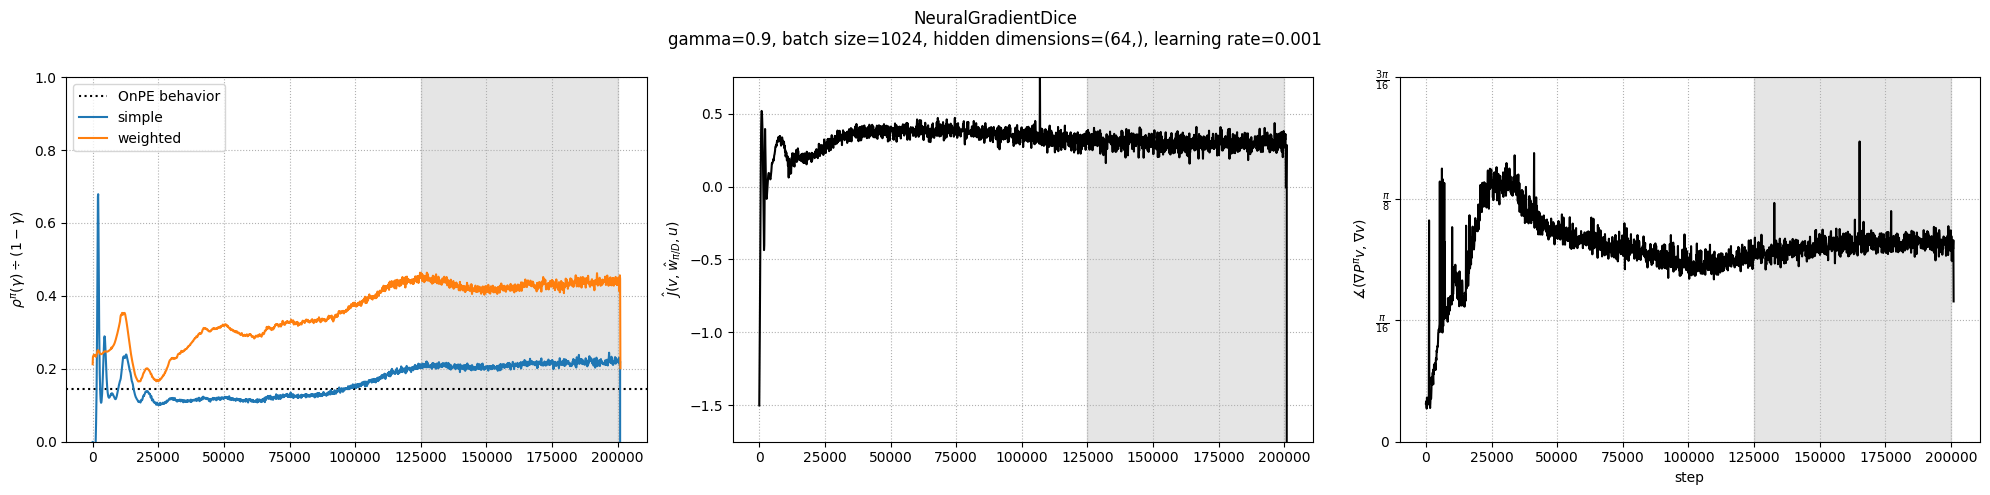

Getting log: data/medical_rl/sepsis_amsterdam/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGenDice/gam0.9_batchs1024_seed42_hdp(64,)_hdd(64,)_lrp1e-05_lrd1e-05_regp0.0_regd0.0_nlr1e-05_nreg1.0/events.out.tfevents.1733657552.MacBook-Pro-von-Richard.local.62831.4.v2


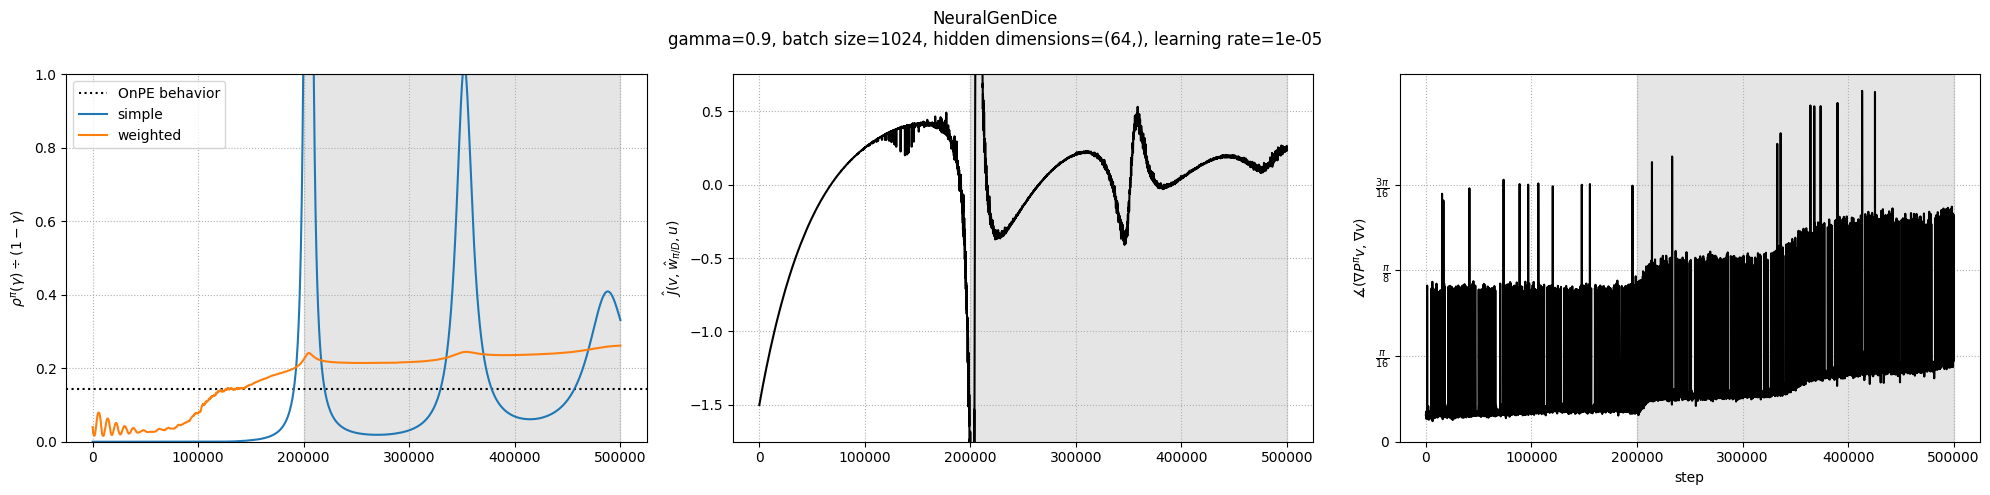

In [83]:
plot_single("NeuralDualDice",     0.9, 1024, (64,), 1e-4, ylim1=(0, 1), ylim2=(0, 2.5),      axvspan=(90_000,  95_000))
plot_single("NeuralGradientDice", 0.9, 1024, (64,), 1e-3, ylim1=(0, 1), ylim2=(-1.75, 0.75), axvspan=(125_000, 200_000))
plot_single("NeuralGenDice",      0.9, 1024, (64,), 1e-5, ylim1=(0, 1), ylim2=(-1.75, 0.75), axvspan=(200_000, 500_000))

Getting log: data/medical_rl/sepsis_amsterdam/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralDualDice/gam0.9_batchs1024_seed42_hdp(128,)_hdd(128,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1733828425.MacBook-Pro-von-Richard.local.8475.0.v2
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


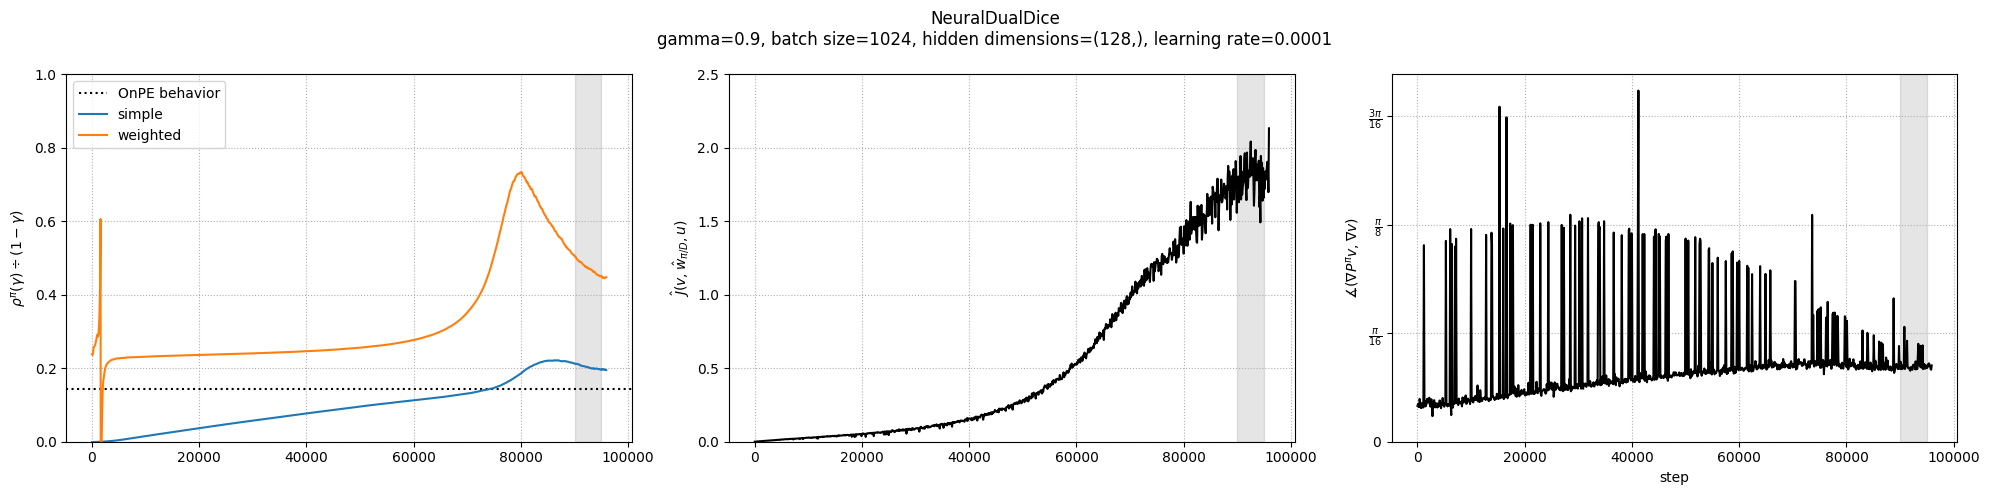

Getting log: data/medical_rl/sepsis_amsterdam/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGradientDice/gam0.9_batchs1024_seed42_hdp(128,)_hdd(128,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg1.0/events.out.tfevents.1733879633.MacBook-Pro-von-Richard.local.21980.0.v2


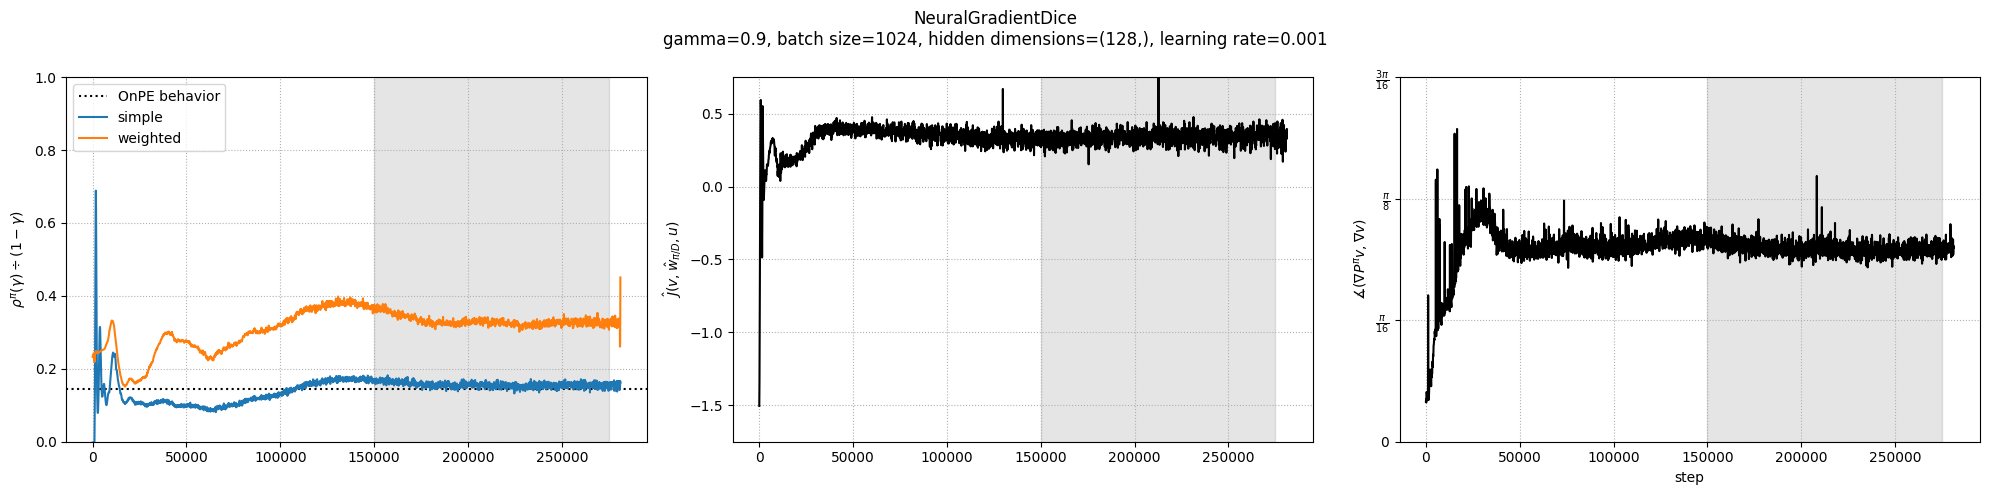

Getting log: data/medical_rl/sepsis_amsterdam/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGenDice/gam0.9_batchs1024_seed42_hdp(128,)_hdd(128,)_lrp1e-05_lrd1e-05_regp0.0_regd0.0_nlr1e-05_nreg1.0/events.out.tfevents.1733838788.e242-227.eduroam.tuwien.ac.at.8475.1.v2


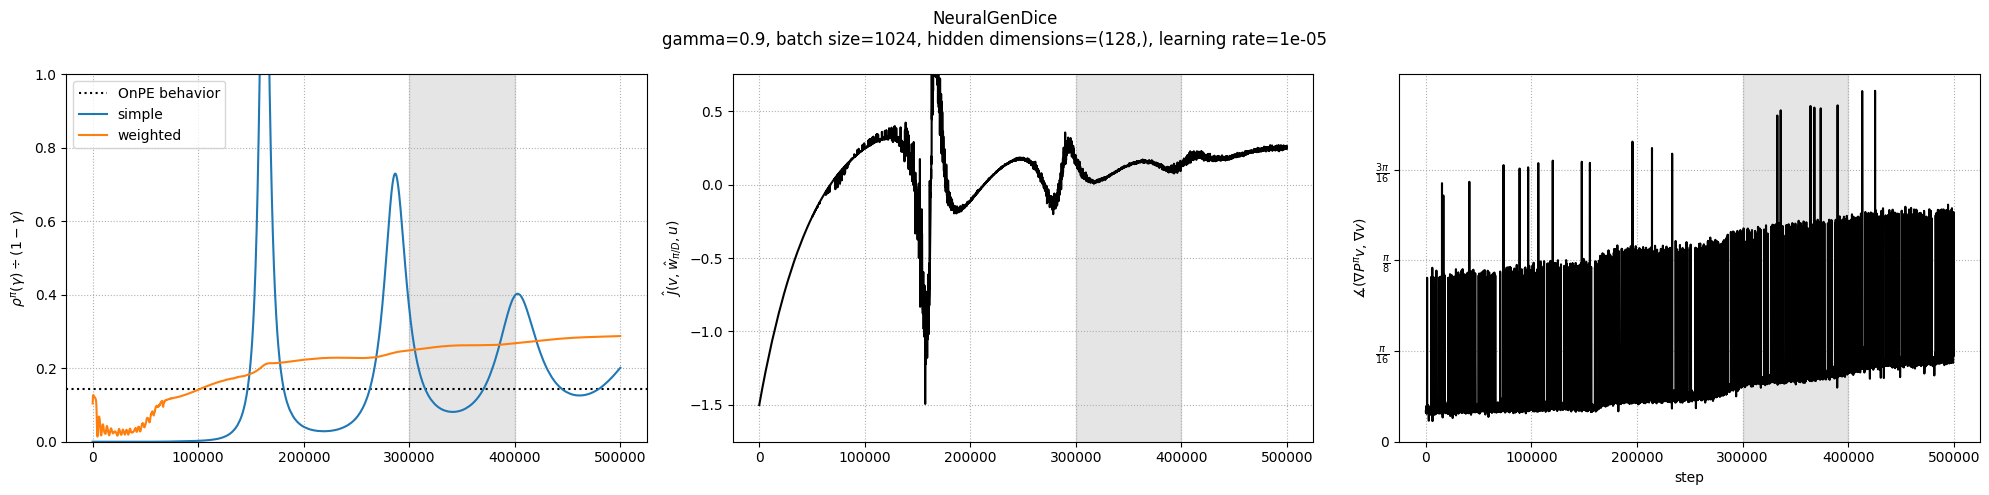

In [5]:
plot_single("NeuralDualDice",     0.9, 1024, (128,), 1e-4, ylim1=(0, 1), ylim2=(0, 2.5),      axvspan=(90_000,  95_000))
plot_single("NeuralGradientDice", 0.9, 1024, (128,), 1e-3, ylim1=(0, 1), ylim2=(-1.75, 0.75), axvspan=(150_000, 275_000))
plot_single("NeuralGenDice",      0.9, 1024, (128,), 1e-5, ylim1=(0, 1), ylim2=(-1.75, 0.75), axvspan=(300_000, 400_000))

Getting log: data/medical_rl/sepsis_amsterdam/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralDualDice/gam0.9_batchs1024_seed42_hdp(256,)_hdd(256,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1733632119.MacBook-Pro-von-Richard.local.62831.2.v2


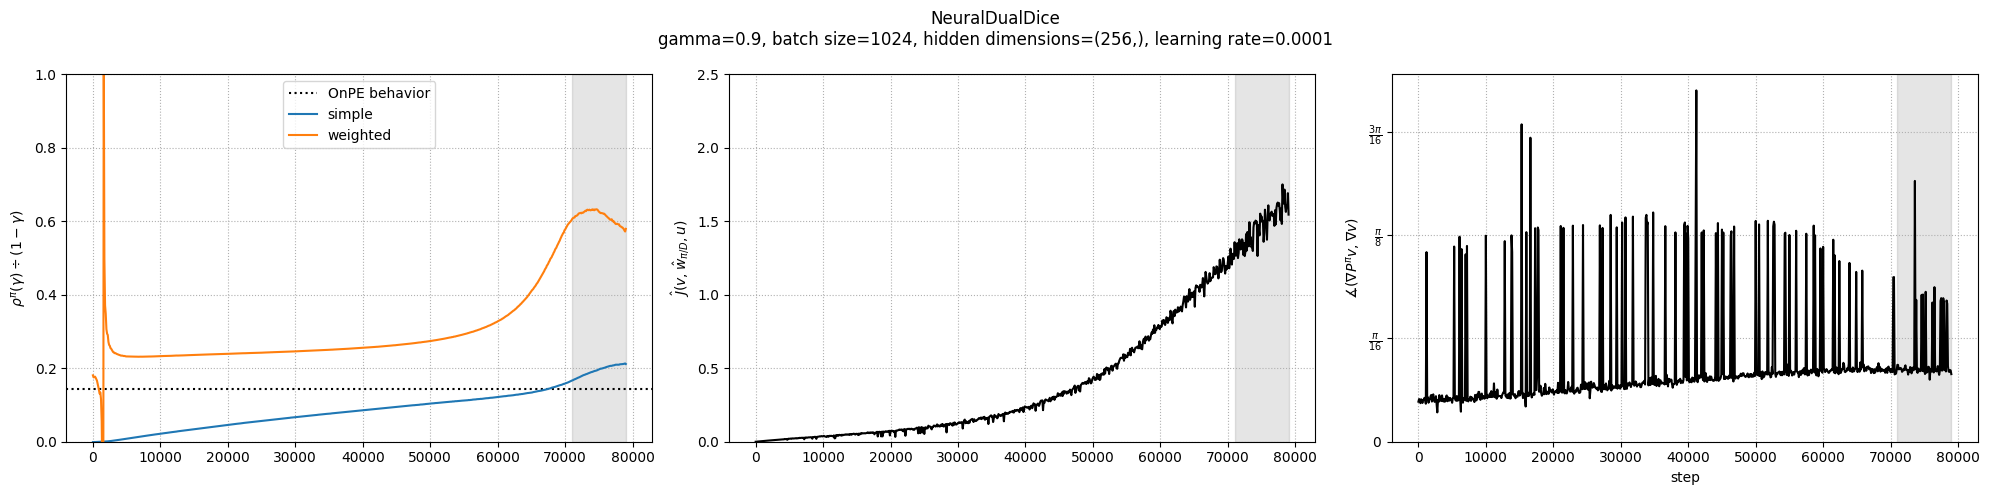

Getting log: data/medical_rl/sepsis_amsterdam/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGradientDice/gam0.9_batchs1024_seed42_hdp(256,)_hdd(256,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg1.0/events.out.tfevents.1733776370.MacBook-Pro-von-Richard.local.90710.2.v2


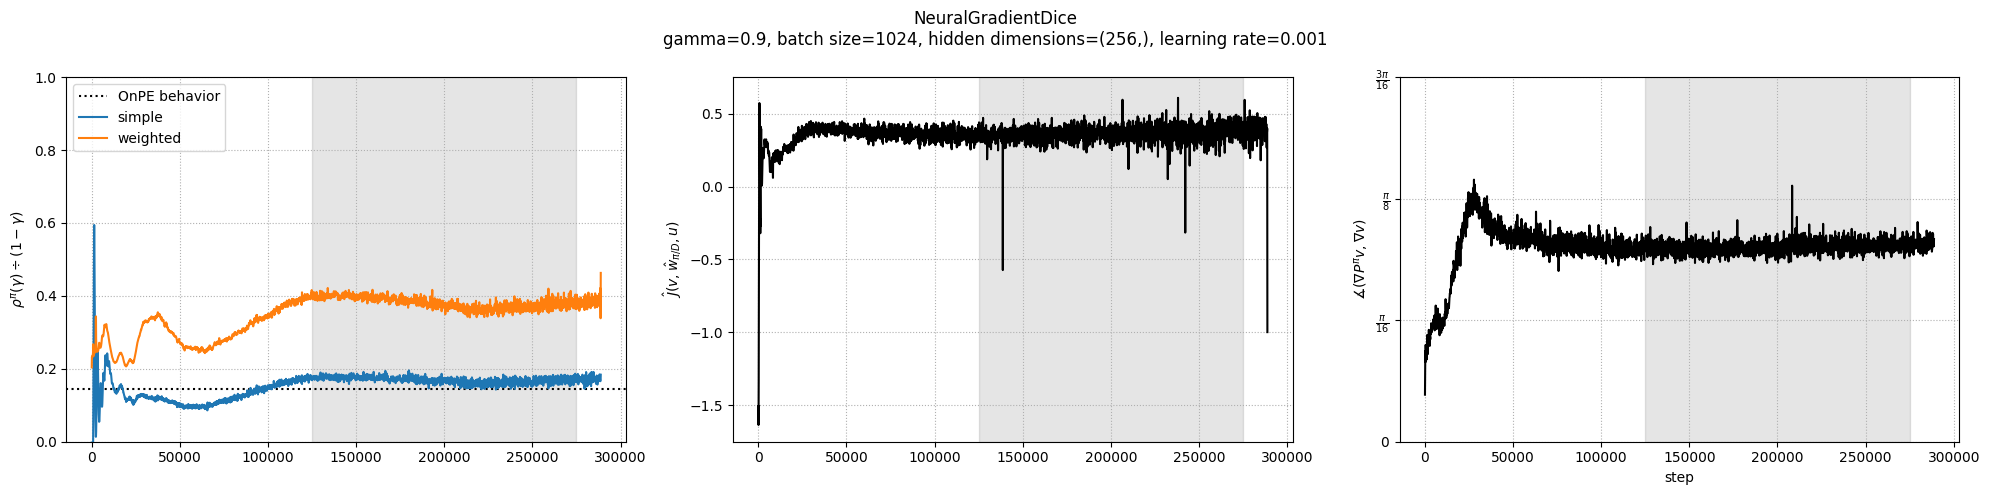

Getting log: data/medical_rl/sepsis_amsterdam/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGenDice/gam0.9_batchs1024_seed42_hdp(256,)_hdd(256,)_lrp1e-05_lrd1e-05_regp0.0_regd0.0_nlr1e-05_nreg1.0/events.out.tfevents.1733701705.MacBook-Pro-von-Richard.local.62831.5.v2


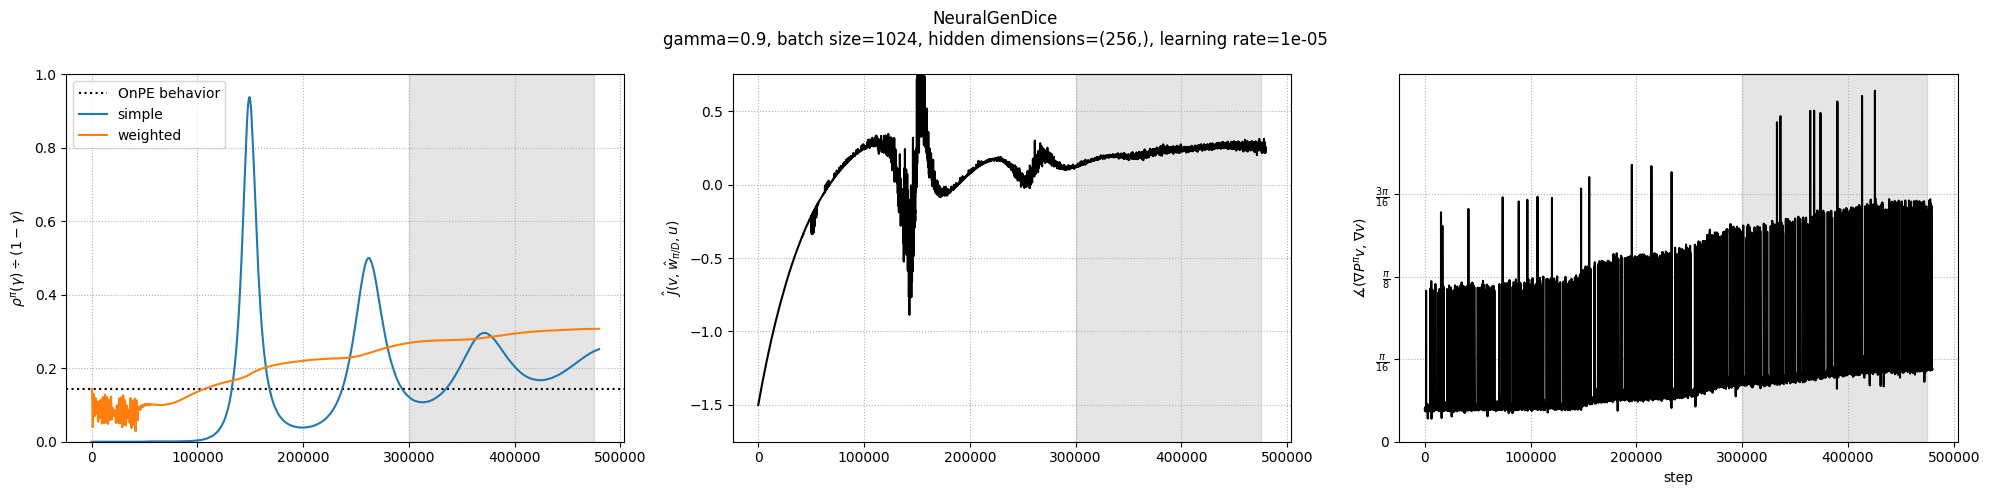

In [85]:
plot_single("NeuralDualDice",     0.9, 1024, (256,), 1e-4, ylim1=(0, 1), ylim2=(0, 2.5),      axvspan=(71_000,  79_000))
plot_single("NeuralGradientDice", 0.9, 1024, (256,), 1e-3, ylim1=(0, 1), ylim2=(-1.75, 0.75), axvspan=(125_000, 275_000))
plot_single("NeuralGenDice",      0.9, 1024, (256,), 1e-5, ylim1=(0, 1), ylim2=(-1.75, 0.75), axvspan=(300_000, 475_000))

In [38]:
def get_stats():

    gam = 0.9
    batchs = 1024
    params = {
        (32,  "Dual"):     [ 1e-4, (100_000, 105_000), "s", ],
        (32,  "Gradient"): [ 1e-3, (100_000, 115_000), "s", ],
        (32,  "Gen"):      [ 1e-5, (200_000, 250_000), "w", ],
        (64,  "Dual"):     [ 1e-4, (90_000,  95_000),  "s", ],
        (64,  "Gradient"): [ 1e-3, (125_000, 200_000), "s", ],
        (64,  "Gen"):      [ 1e-5, (200_000, 500_000), "w", ],
        (128, "Dual"):     [ 1e-4, (90_000,  95_000),  "s", ],
        (128, "Gradient"): [ 1e-3, (150_000, 275_000), "s", ],
        (128, "Gen"):      [ 1e-5, (300_000, 400_000), "w", ],
        (256, "Dual"):     [ 1e-4, (71_000,  79_000),  "s", ],
        (256, "Gradient"): [ 1e-3, (125_000, 275_000), "s", ],
        (256, "Gen"):      [ 1e-5, (300_000, 475_000), "w", ],
    }

    stats = {}

    for k, v in params.items():

        hd, alg = k
        lr, axvspan, ws = v

        algorithm = f"Neural{alg}Dice"

        if algorithm == "NeuralDualDice":
            x = f"gam{gam}_batchs{batchs}_seed42_hdp({hd},)_hdd({hd},)_lrp{lr}_lrd{lr}_regp0.0_regd0.0_fexp1.5"
        else:
            x = f"gam{gam}_batchs{batchs}_seed42_hdp({hd},)_hdd({hd},)_lrp{lr}_lrd{lr}_regp0.0_regd0.0_nlr{lr}_nreg1.0"
        hparam_str_evaluation = x

        log = get_logs(
            log_dir=os.path.join(
                outputs_dir, hparam_str_dataframe, hparam_str_policy, hparam_str_dataset,
                algorithm,
                hparam_str_evaluation,
            ),
        )

        x = np.array(log["data"][f"pv_{ws}"]["steps"])
        y = np.array(log["data"][f"pv_{ws}"]["values"])

        x_min, x_max = axvspan
        mask = (x_min <= x) * (x <= x_max)

        mean = np.mean(y[mask])
        std  = np.std (y[mask])

        stats[k] = mean, std

    return stats

stats = get_stats()

Getting log: data/medical_rl/sepsis_amsterdam/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralDualDice/gam0.9_batchs1024_seed42_hdp(32,)_hdd(32,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1733620284.MacBook-Pro-von-Richard.local.62831.0.v2
Getting log: data/medical_rl/sepsis_amsterdam/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGradientDice/gam0.9_batchs1024_seed42_hdp(32,)_hdd(32,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg1.0/events.out.tfevents.1733755019.MacBook-Pro-von-Richard.local.90710.0.v2
Getting log: data/medical_rl/sepsis_amsterdam/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGenDice/gam0.9_batchs1024_seed42_hdp(32,)_hdd(32,)_lrp1e-05_lrd1e-05_regp0.0_regd0.0_nlr1e-05_nreg1.0/events.out.tfevents.1733639468.MacBook-Pro-von-Richard.local.62831.3

In [39]:
stats

{(32, 'Dual'): (0.02305845368653536, 0.0006446220964160306),
 (32, 'Gradient'): (0.017296524206484785, 0.0011614024103945401),
 (32, 'Gen'): (0.014848335744616038, 0.00033777072522952247),
 (64, 'Dual'): (0.022873063590012344, 0.0002637363428244156),
 (64, 'Gradient'): (0.021174564620308808, 0.0007519925095931142),
 (64, 'Gen'): (0.023192439894280367, 0.001386534377725557),
 (128, 'Dual'): (0.020339642304415796, 0.0005106793305069665),
 (128, 'Gradient'): (0.01563065267465026, 0.0007412442028200774),
 (128, 'Gen'): (0.026024607119041605, 0.0004784522292789166),
 (256, 'Dual'): (0.019424891674224242, 0.0014018382284940248),
 (256, 'Gradient'): (0.016896301412645934, 0.0008658037296076363),
 (256, 'Gen'): (0.02894784108459575, 0.0012517590099471467)}

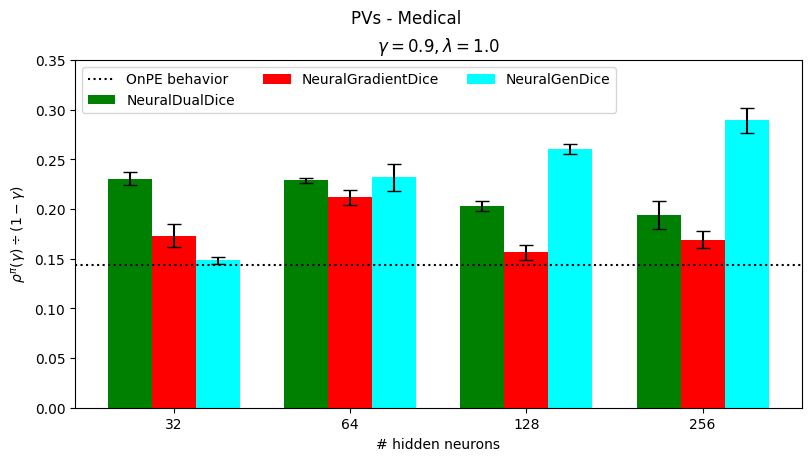

In [50]:
def group_barplot(
        group_names, grouped_values,
        title=None, suptitle=None, xlabel=None, ylabel=None, ylim=None,
        bar_width=0.25, bar_labels=False, bar_colors=None,
        legend_loc=None, figsize=None, capsize=None, baselines=None):

    # https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

    plt.figure( layout="constrained", figsize=figsize, )

    x = np.arange( len(group_names) )

    for i, (attribute, measurement) in enumerate( grouped_values.items() ):
        yerr=None
        if capsize is not None:
            y    = [ m[0] for m in measurement ]
            yerr = [ m[1] for m in measurement ]

        label = attribute

        color = None
        if bar_colors is not None:
            color = bar_colors[i]

        offset = bar_width * i
        rects = plt.bar(x + offset, y, bar_width, yerr=yerr, capsize=capsize, label=label, color=color)
        if bar_labels: plt.bar_label(rects, padding=3)

    if baselines is not None:
        for label, y in baselines.items():
            plt.axhline(y, label=label, color="black", linestyle=":")

    plt.xticks(x + bar_width, group_names)
    plt.legend(loc=legend_loc, ncols=3)

    if suptitle is not None: plt.suptitle(suptitle)
    if title    is not None: plt.title(title)
    if ylabel   is not None: plt.ylabel(ylabel)
    if xlabel   is not None: plt.xlabel(xlabel)
    if ylim     is not None: plt.ylim(ylim)

    plt.show()

hidden_dimensions = [ 32, 64, 128, 256, ]
algorithms = ["Dual", "Gradient", "Gen"]
gamma = 0.9

latex_gamma = r"\gamma"
latex_lambda = r"\lambda"

group_barplot(
    group_names=hidden_dimensions,
    grouped_values = {
        f"Neural{algorithm}Dice": [ np.array(stats[(hd, algorithm)]) / (1 - gamma) for hd in hidden_dimensions ]
            for algorithm in algorithms
    },
    suptitle="PVs - Medical",
    title=f"${latex_gamma}={gamma}, {latex_lambda}=1.0$",
    xlabel="# hidden neurons",
    ylabel=latex_labels["pv_scaled"](None),
    ylim=(None, 0.35),
    bar_width=0.25,
    bar_labels=False,
    bar_colors=["green", "red", "cyan"],
    legend_loc="upper left",
    figsize=(8, 4.5),
    capsize=5,
    baselines={
        "OnPE behavior": get_behavior_policy_value(gamma) / (1 - gamma),
    }
)

# All Plots

In [52]:
learning_rates = [1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
hidden_dimss = [ (32,), (64,), (128,), (256,), ]

Getting log: data/medical_rl/sepsis_amsterdam/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralDualDice/gam0.9_batchs1024_seed42_hdp(128,)_hdd(128,)_lrp0.001_lrd0.001_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1733396444.MacBook-Pro-von-Richard.local.86030.3.v2
Getting log: data/medical_rl/sepsis_amsterdam/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralDualDice/gam0.9_batchs1024_seed42_hdp(128,)_hdd(128,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1733396457.MacBook-Pro-von-Richard.local.86030.4.v2
Getting log: data/medical_rl/sepsis_amsterdam/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralDualDice/gam0.9_batchs1024_seed42_hdp(128,)_hdd(128,)_lrp1e-05_lrd1e-05_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1733403353.MacBook-Pro-von-Richard.local.86030.5.v2


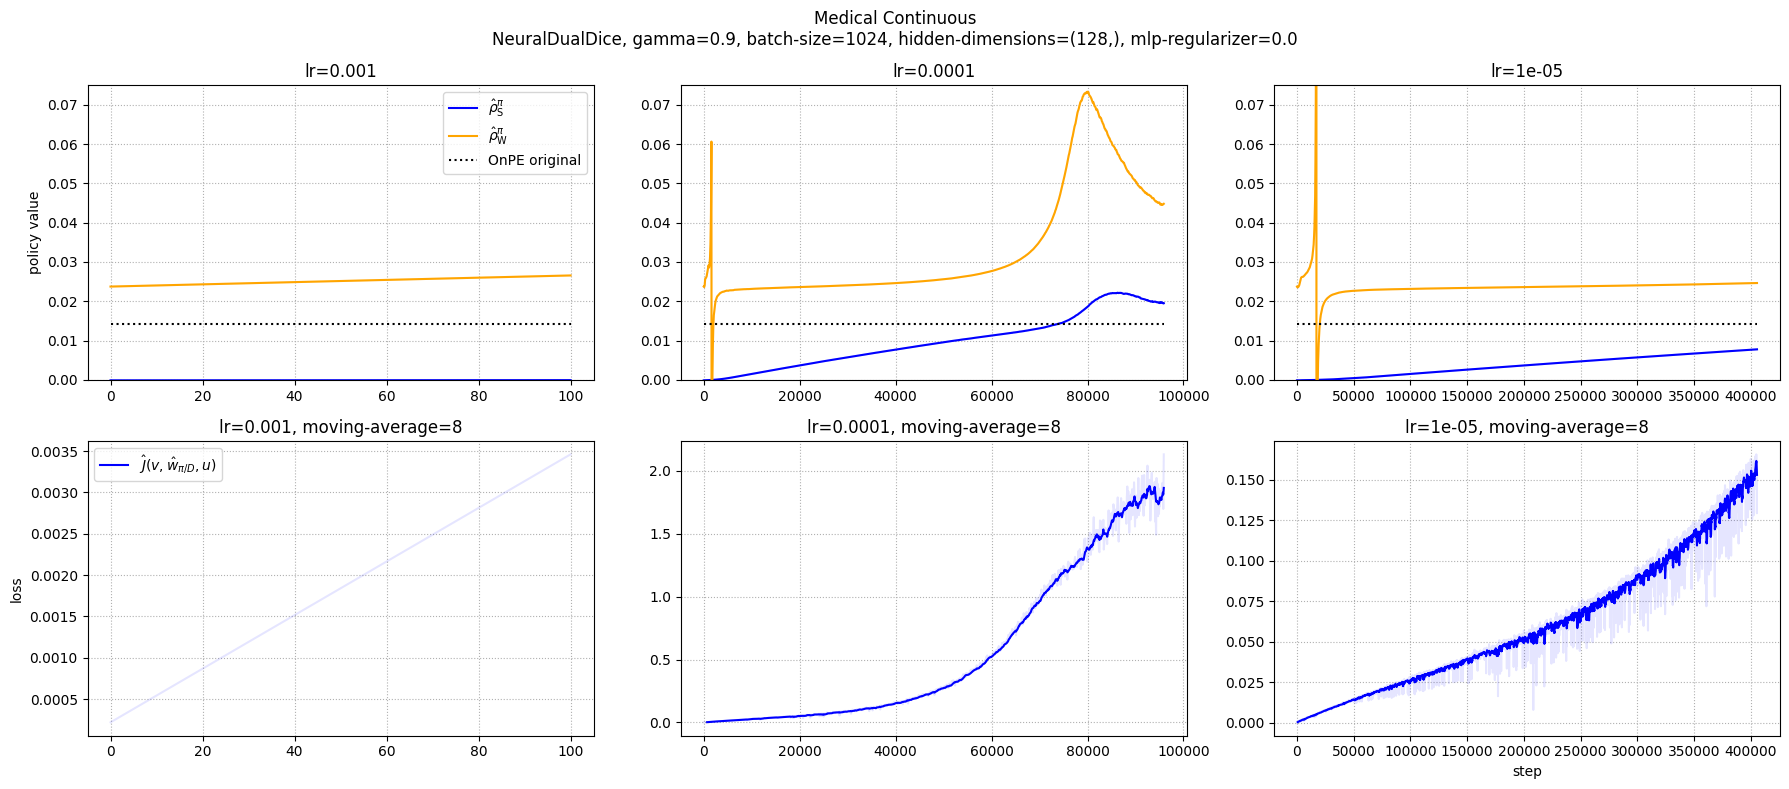

In [53]:
get_plot_logs(
    get_behavior_policy_value,
    #
    os.path.join(outputs_dir,  hparam_str_dataframe),
    hparam_str_policy, hparam_str_dataset,
    estimator_name="NeuralDualDice", hparam_str_evaluation=[
        f"gam0.9_batchs1024_seed42_hdp(128,)_hdd(128,)_lrp{lr}_lrd{lr}_regp0.0_regd0.0_fexp1.5"
            for lr in learning_rates[-3:]
    ],
    title = [
        [
            f"{lr=}", None, f"{lr=}, moving-average=8",
        ]
            for lr in learning_rates[-3:]
    ],
    n_ma_1=1, n_ma_3=8,
    ylim_1=(0, 0.075),
    save_dir=save_dir_images,
)

Getting log: data/medical_rl/sepsis_amsterdam/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGenDice/gam0.9_batchs1024_seed42_hdp(128,)_hdd(128,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_nlr0.0001_nreg1.0/events.out.tfevents.1733437454.MacBook-Pro-von-Richard.local.98200.4.v2
Getting log: data/medical_rl/sepsis_amsterdam/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGenDice/gam0.9_batchs1024_seed42_hdp(128,)_hdd(128,)_lrp1e-05_lrd1e-05_regp0.0_regd0.0_nlr1e-05_nreg1.0/events.out.tfevents.1733438598.MacBook-Pro-von-Richard.local.98200.5.v2


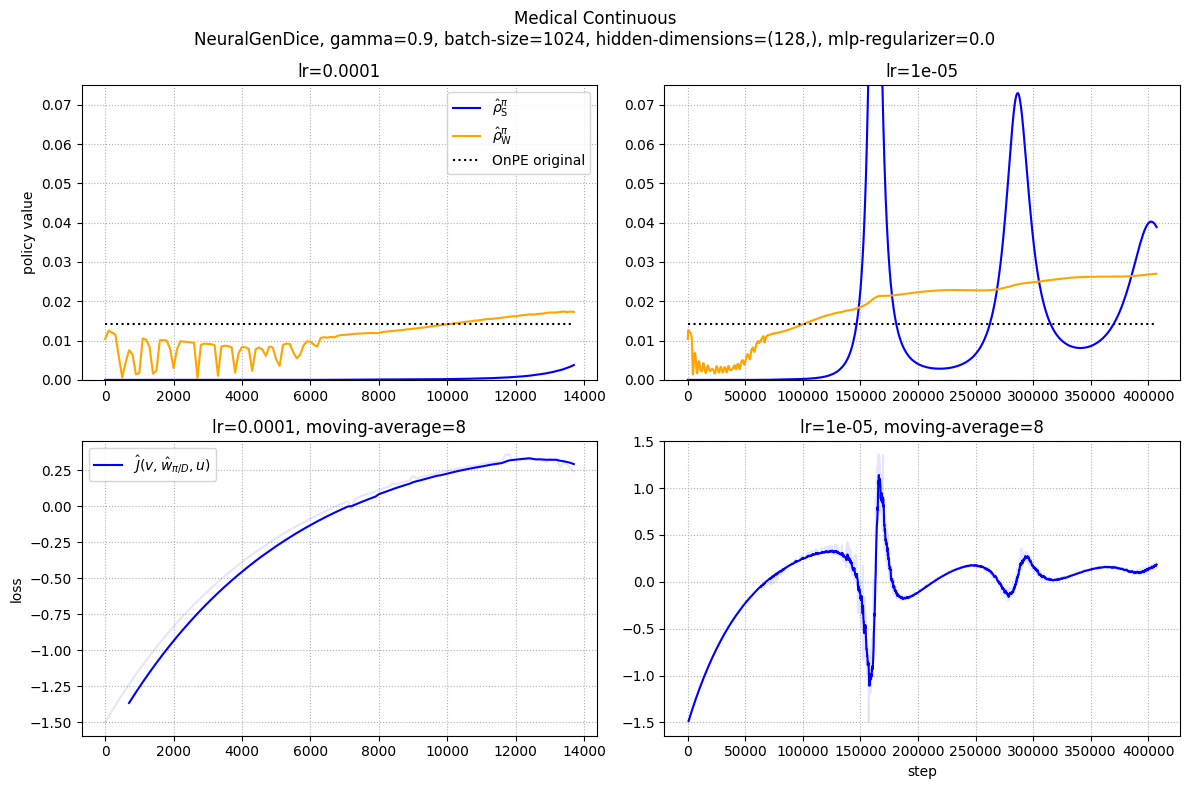

In [54]:
get_plot_logs(
    get_behavior_policy_value,
    #
    os.path.join(outputs_dir,  hparam_str_dataframe),
    hparam_str_policy, hparam_str_dataset,
    estimator_name="NeuralGenDice", hparam_str_evaluation=[
        f"gam0.9_batchs1024_seed42_hdp(128,)_hdd(128,)_lrp{lr}_lrd{lr}_regp0.0_regd0.0_nlr{lr}_nreg1.0"
            for lr in learning_rates[-2:]
    ],
    title = [
        [
            f"{lr=}", None, f"{lr=}, moving-average=8",
        ]
            for lr in learning_rates[-2:]
    ],
    n_ma_1=1, n_ma_3=8,
    ylim_1=(0, 0.075),
    save_dir=save_dir_images,
)

Getting log: data/medical_rl/sepsis_amsterdam/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGradientDice/gam0.9_batchs1024_seed42_hdp(128,)_hdd(128,)_lrp0.01_lrd0.01_regp0.0_regd0.0_nlr0.01_nreg1.0/events.out.tfevents.1733473407.MacBook-Pro-von-Richard.local.11861.2.v2
Getting log: data/medical_rl/sepsis_amsterdam/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGradientDice/gam0.9_batchs1024_seed42_hdp(128,)_hdd(128,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg1.0/events.out.tfevents.1733473511.MacBook-Pro-von-Richard.local.11861.3.v2
Getting log: data/medical_rl/sepsis_amsterdam/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGradientDice/gam0.9_batchs1024_seed42_hdp(128,)_hdd(128,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_nlr0.0001_nreg1.0/events.out.tfevents.1733499050.MacBook-Pro-von

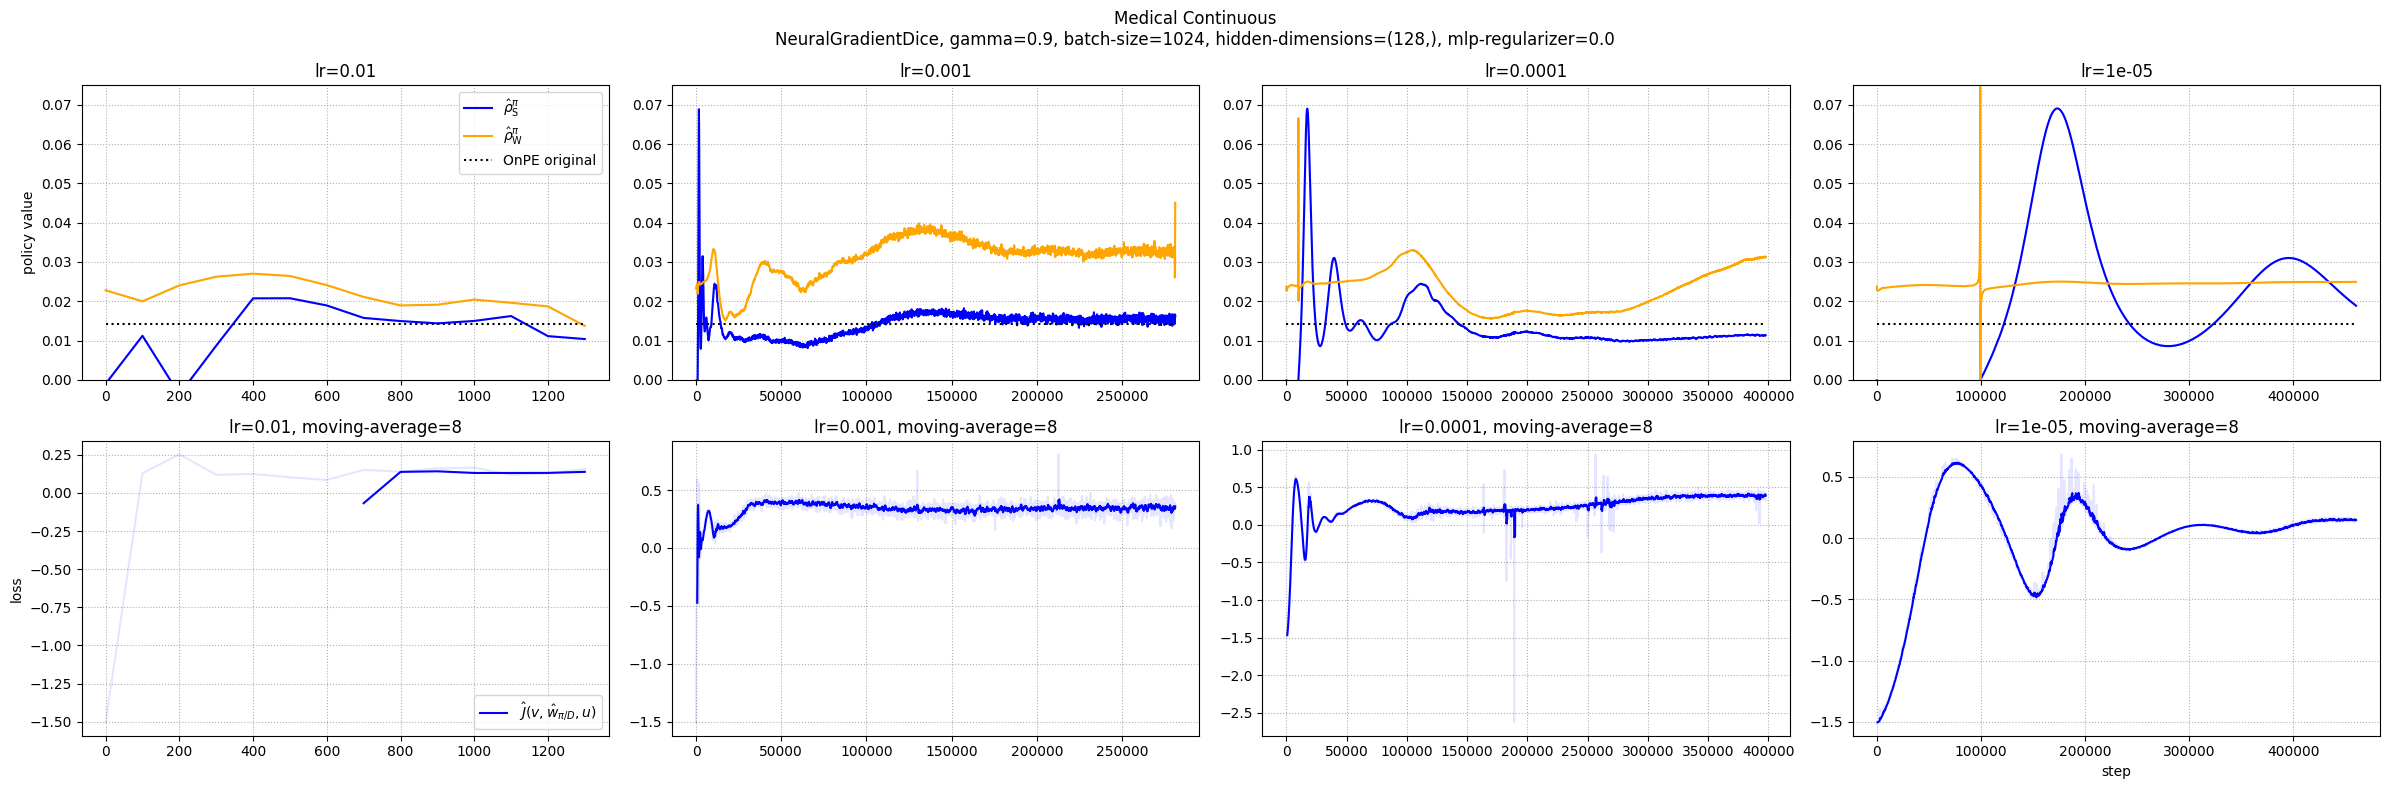

In [55]:
get_plot_logs(
    get_behavior_policy_value,
    #
    os.path.join(outputs_dir,  hparam_str_dataframe),
    hparam_str_policy, hparam_str_dataset,
    estimator_name="NeuralGradientDice", hparam_str_evaluation=[
        f"gam0.9_batchs1024_seed42_hdp(128,)_hdd(128,)_lrp{lr}_lrd{lr}_regp0.0_regd0.0_nlr{lr}_nreg1.0"
            for lr in learning_rates[-4:]
    ],
    title = [
        [
            f"{lr=}", None, f"{lr=}, moving-average=8",
        ]
            for lr in learning_rates[-4:]
    ],
    n_ma_1=1, n_ma_3=8,
    ylim_1=(0, 0.075),
    save_dir=save_dir_images,
)